<a href="https://colab.research.google.com/github/muhammad-usama-aleem/ML-Day-21-ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries** 

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

# Part 1- **Data Preprocessing**

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

**Encoding categorical data**

In [4]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Splitting the dataset**

In [6]:

from sklearn.model_selection import train_test_split
X_traitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape

(8000, 12)

# Part 2 - **Building the ANN**

In [7]:
import keras
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense
# Initializing the ANN
compiler = Sequential()

# Adding the input layer and the first hidden layer
compiler.add(tf.keras.Input(shape=(12,)))
compiler.add(Dense(units=6, activation='relu'))

# Adding the second hidden layer
compiler.add(Dense(units=6, activation='relu'))

# Adding the output layer
compiler.add(Dense(units=1, activation='sigmoid'))
# for binary category output we use sigmoid

# Part 3 - Training the ANN

# Compiling the ANN
compiler.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Training the ANN on the Training set
compiler.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 956us/step - loss: 0.5618 - accuracy: 0.7506
Epoch 2/100
250/250 [==============================] - 0s 982us/step - loss: 0.4789 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8011
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8079
Epoch 5/100
250/250 [==============================] - 0s 976us/step - loss: 0.4263 - accuracy: 0.8109
Epoch 6/100
250/250 [==============================] - 0s 948us/step - loss: 0.4196 - accuracy: 0.8164
Epoch 7/100
250/250 [==============================] - 0s 983us/step - loss: 0.4138 - accuracy: 0.8221
Epoch 8/100
250/250 [==============================] - 0s 962us/step - loss: 0.4088 - accuracy: 0.8284
Epoch 9/100
250/250 [==============================] - 0s 939us/step - loss: 0.4049 - accuracy: 0.8306
Epoch 10/100
250/250 [==============================] - 0s 956us/step - loss:

Part 3 - **Evaluating ANN Model**

In [8]:
# Predicting the Test set results
y_pred = compiler.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1497   98]
 [ 181  224]]


Part 4- **Visualizing our ANN model**

In [ ]:
pip install ann_visualizer

In [11]:
from ann_visualizer.visualize import ann_viz;

ann_viz(compiler, view=True, filename="network.gv", title="")

In [14]:
import pydot

(graph,) = pydot.graph_from_dot_file('network.gv')
graph.write_png('network.png')

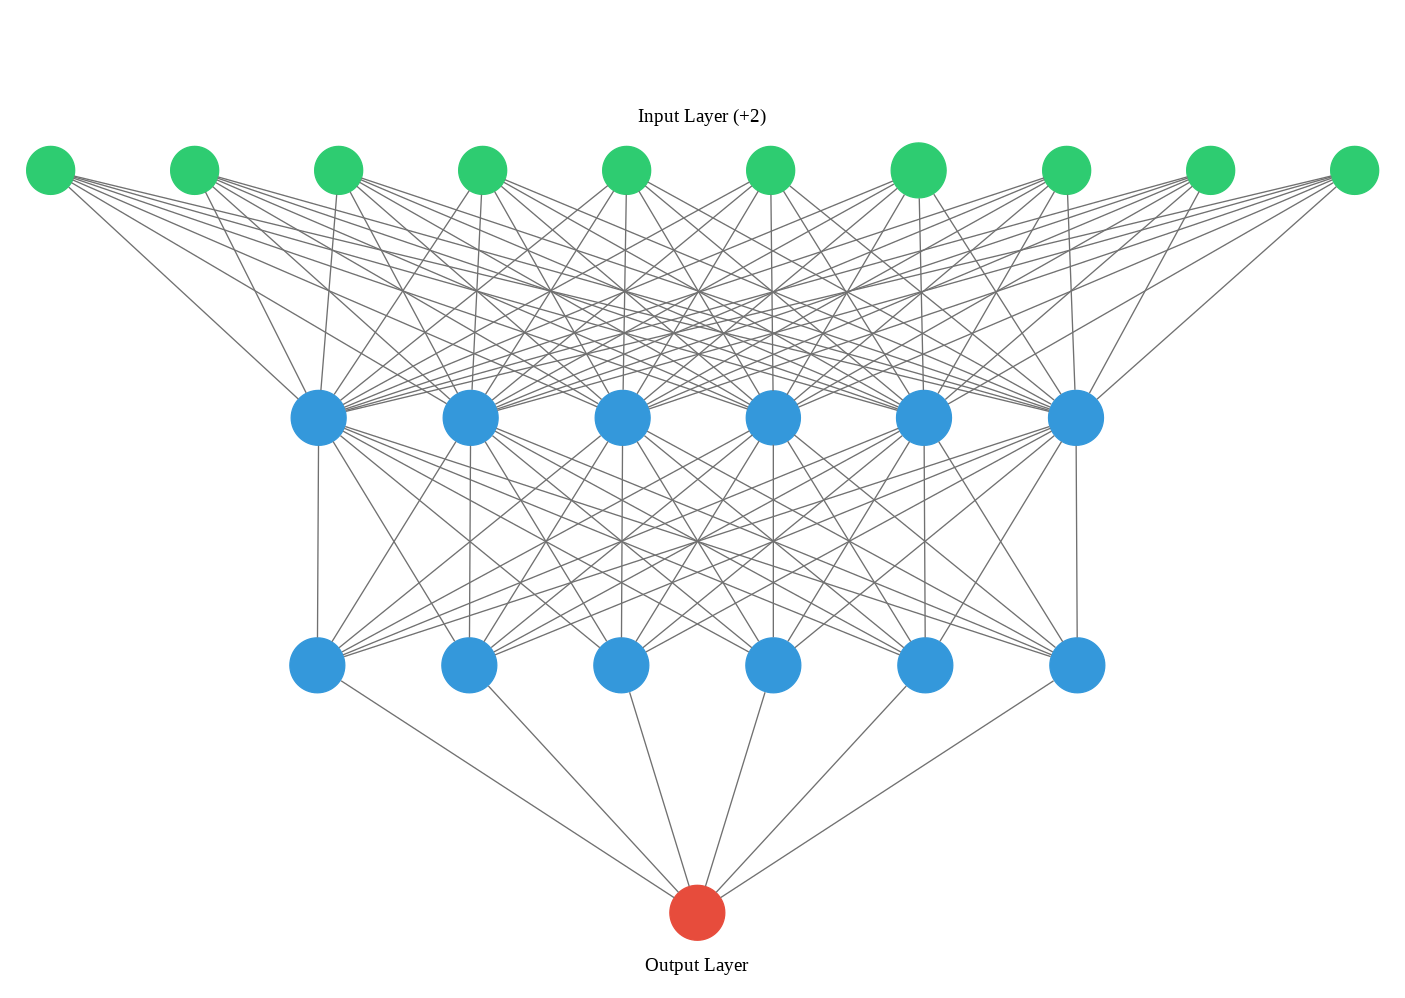

In [28]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('network.png')
cv2_imshow(img)
